In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Visualization and Exploration

In [2]:
# Use Pandas to read in the data, label the first column "Population" and the second column "Profit"
# Display that first few rows of the data.
URL = 'http://facweb1.redlands.edu/fac/joanna_bieri/machinelearning/ex1data1.txt'

df = pd.read_csv(URL, header=None)
df.columns=["Population","Profit"]
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


## Seaborn Package

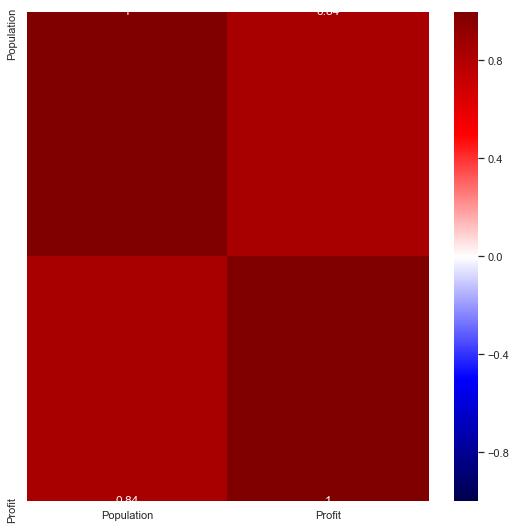

In [4]:
import seaborn as sns
# Documentation: https://seaborn.pydata.org/

# Visualizing correlation with Seaborn
sns.set(rc={'figure.figsize':(9,9)})
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

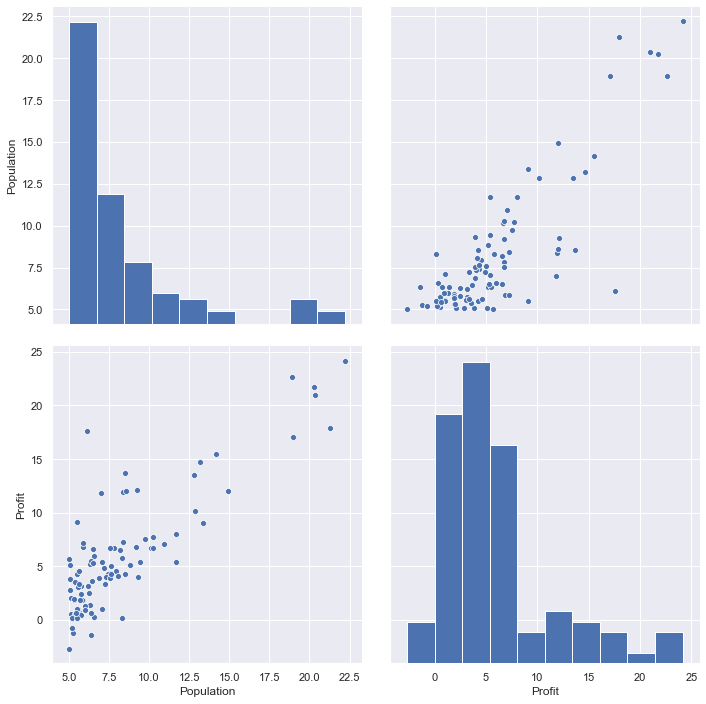

In [7]:
# Delete all rows that contain NaN or not numbers
df.dropna(inplace=True)

# Plot all of the variable-to-variable relations as scatterplots - this should just run
sns.pairplot(df,size=5)

## Data Normalization

In most cases you will want to make sure that each of your features (x) are normalized. What this means is that we want the data to have a few characteristics:

- Each of the features has approximately the same scale
- Most of your data falls between -1 and 1
- This is not unique and there are lots of ways to do this... here are two

- This helps numerical optimization methods converge faster and helps avoid over/under flow errors
- Much more important in problems with many features!

### Min Mix Normalization

The simplest method 

The general formula for a min-max of [0, 1] is given as:

$$  x'={\frac {x-{\text{min}}(x)}{{\text{max}}(x)-{\text{min}}(x)}} $$

This scales your data to 0 < x' < 1

In [5]:
# For our data set above

f = df.iloc[:,0].values.reshape(-1,1)
fmin = np.min(f,axis=0)
fmax = np.max(f,axis=0)

fscale = (f-fmin)/(fmax - fmin)

# Then create X
ones = np.ones_like(f).reshape(-1,1)
X = np.hstack((ones, fscale))
print(X.shape)

print(X[:5])

### Be Careful - if you do the scaling after creating matrix X, remember you don't need to scale the ones column!!

(97, 2)
[[1.         0.06306437]
 [1.         0.02915679]
 [1.         0.20328829]
 [1.         0.11506104]
 [1.         0.0484918 ]]


### Mean Normalization

Simple Mean normalization

$$ x'={\frac {x-{\text{average}}(x)}{{\text{max}}(x)-{\text{min}}(x)}} $$


### Standardization

Similar to above just divide by the standard deviation

$$ x'={\frac {x-{\text{average}}(x)}{{\text{std}} (x)}} $$

In [39]:
f = df.iloc[:,0].values.reshape(-1,1)
fmean = np.mean(f,axis=0)
fstd = np.std(f,axis=0)

fscale = (f-fmean)/(fstd)

# Then create X
ones = np.ones_like(f).reshape(-1,1)
X = np.hstack((ones, fscale))
print(X.shape)

print(X[:5])


(97, 2)
[[ 1.         -0.53240565]
 [ 1.         -0.68368294]
 [ 1.          0.09319761]
 [ 1.         -0.30042464]
 [ 1.         -0.5974206 ]]
